### 다변수 가우시안 정규 분포
다변수 가우시안 정규 분포 혹은 간단히 다변수 정규 분포(MVN: Multivariate Normal)는 **복수의 확률 변수를 모형화**하는데 가장 많이 사용되는 분포이다.

**$D$ 차원 다변수 정규 분포의 확률 밀도 함수는 평균 벡터 $μ$와 공분산 행렬 $Σ$라는 두 개의 모수를 가지며** 다음과 같은 수식으로 정의된다. 이 때 **공분산 행렬은 역행렬이 존재하는 대칭 행렬이어야 한다.**

$$\mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)$$
 
이 식에서 각 기호의 의미는 다음과 같다.

- $x∈R^D$  확률 변수 벡터
- $μ∈R^D$  평균 벡터
- $Σ∈R^{D×D}$  공분산 행렬
- $Σ^{−1}∈R^{D×D}$  공분산 행렬의 역행렬

공분산 행렬의 역행렬 $Σ^{−1}$는 precision matrix 혹은 concentration matrix 라고도 한다.

- 다변수 가우시안 정규분포일 때는 확률분포의 상관계수 $\rho$가 0이면 독립이다.

### SciPy의 다변수 정규 분포 명령
SciPy의 stats 서브패키지에는 다변수 정규 분포를 위한 `multivariate_normal` 명령이 있다. `mean` 인수로 평균 벡터를, `cov` 인수로 공분산 행렬을 받는다.

##### 다변수 정규 분포의 예
2차원($D=2$) 다변수 정규 분포의 예를 몇가지 살펴보자.
우선 2차원이므로 확률 변수 벡터는 다음과 같다.

$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

- 경우1

만약 $\mu$와 $\sigma$가 아래와 같다면

$$\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}, \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$

$| \Sigma|$와 $\Sigma^{-1}$는

$$| \Sigma| = 1, \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
(x_1 - 2)^2 + (x_2 - 3)^2$$

$$\mathcal{N}(x_1, x_2) = \dfrac{1}{2\pi}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)$$

이 확률 밀도 함수의 모양은 다음과 같다.

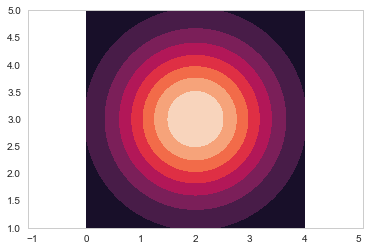

In [1]:
%matplotlib inline
mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

- 경우 2

$$\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}, \;\;\;
\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix}$$

이면,

$$|\Sigma| = 5,\;\;\;
\Sigma^{-1} = \begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4 \end{bmatrix}$$

$$(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4\end{bmatrix}
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
\dfrac{1}{10}\left(14(x_1 - 2)^2 - 12(x_1 - 2)(x_2 - 3) + 4(x_2 - 3)^2\right)$$

$$\mathcal{N}(x_1, x_2) = \dfrac{1}{2\sqrt{5}\pi}
\exp \left( -\dfrac{1}{10}\left(7(x_1 - 2)^2 - 6(x_1 - 2)(x_2 - 3) + 2(x_2 - 3)^2\right) \right)$$

이 확률 밀도 함수의 모양은 다음과 같다.

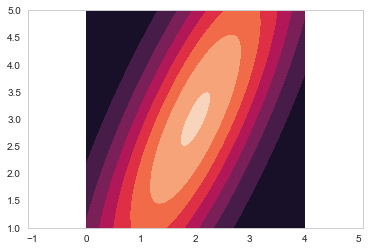

In [2]:
mu = [2, 3]
cov = [[2, 3],[3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

#### '고유값 분해'에서 '가우시안 정규 분포의 좌표 변환'과 연결됨

### 가우시안 정규 분포의 좌표 변환
다변수 가우시안 정규 분포의 확률 밀도 함수  N(x) 는 이차형식의 지수함수에 비례한다.

$$\mathcal{N}(x) \propto \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)$$
 
위 식에서 공분산 행렬 $Σ$은 대칭 행렬이므로 위의 관계가 성립하므로 다음처럼 대각화할 수 있다.

$$\begin{eqnarray}
\mathcal{N}(x) 
&\propto& \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^{-1}(x-\mu))^T  \Lambda^{-1} (V^{-1} (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
\end{eqnarray}$$

즉 고유벡터 행렬 $V$를 변환 행렬로 사용하여 $x$를 $x′=VT(x−μ)$로 좌표 변환하면, 좌표 변환된 새로운 $x$들의 공분산 행렬은 대각 행렬인 고윳값 행렬 $Λ$가 된다. 즉 좌표 변환된 $x′$들은 서로 독립인 성분이 된다. 또한 고유벡터 행렬 $V$의 각 열, 즉 고유 벡터들은 독립인 성분을 가리키는 기저 벡터가 된다.

In [3]:
mu = [2, 3]
cov = [[4, 3],[3, 5]]

In [4]:
w, V = np.linalg.eig(cov)

In [5]:
w

array([1.45861873, 7.54138127])

In [6]:
V

array([[-0.76301998, -0.6463749 ],
       [ 0.6463749 , -0.76301998]])

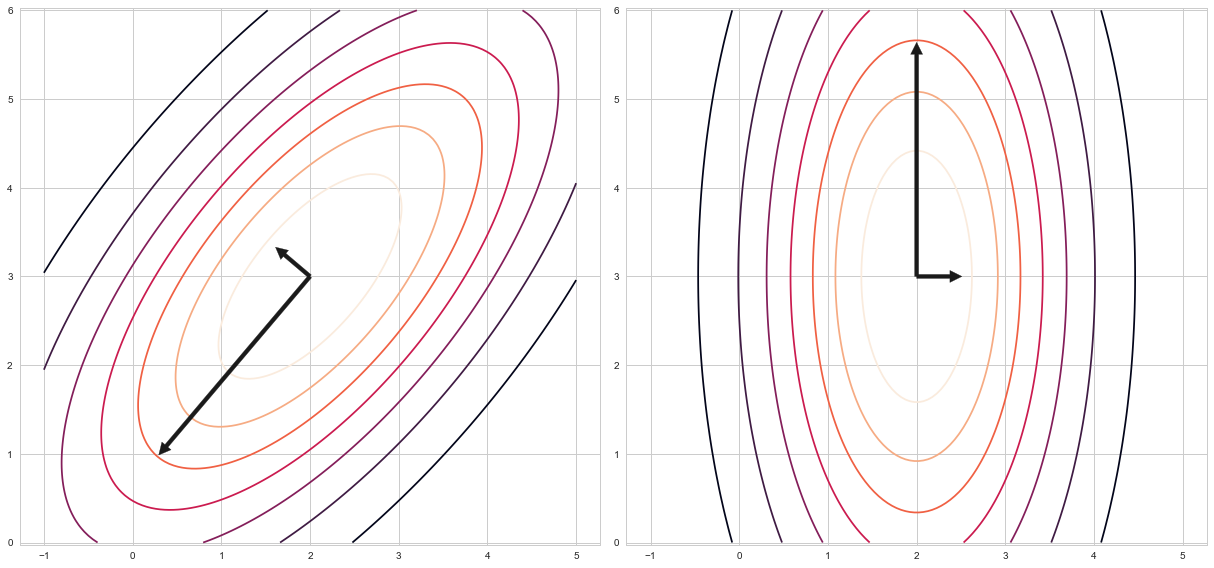

In [7]:
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.figure(figsize=(17, 8))

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * V[:,0]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * V[:,1]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w) # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.tight_layout()
plt.show()